# Anscombe's Quartet: Why Visualization Matters

## A Critical Lesson in Exploratory Data Analysis

Anscombe's Quartet, created by statistician Francis Anscombe in 1973, is one of the most important demonstrations in data analysis. It shows four datasets that have nearly identical statistical properties but are completely different when visualized.

### Key Learning Objective:
**Summary statistics alone can be misleading. Always visualize your data!**

## Setup and Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

print("Libraries loaded successfully!")

Libraries loaded successfully!


## Step 1: Create Anscombe's Quartet Data

The quartet consists of four datasets (I, II, III, IV) with 11 points each.

In [2]:
# Anscombe's Quartet data
anscombe_data = {
    'I': {
        'x': [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5],
        'y': [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
    },
    'II': {
        'x': [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5],
        'y': [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
    },
    'III': {
        'x': [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5],
        'y': [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
    },
    'IV': {
        'x': [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8],
        'y': [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]
    }
}

# Convert to DataFrames for easier manipulation
datasets = {}
for name, data in anscombe_data.items():
    datasets[name] = pd.DataFrame(data)
    
print("Anscombe's Quartet datasets created!")
print("\nDataset I (first 5 rows):")
print(datasets['I'].head())

Anscombe's Quartet datasets created!

Dataset I (first 5 rows):
    x     y
0  10  8.04
1   8  6.95
2  13  7.58
3   9  8.81
4  11  8.33


## Step 2: Display the Raw Data

Let's look at all four datasets side by side to see if we can spot the differences just from the numbers.

In [3]:
# Display all datasets side by side
print("="*70)
print("ANSCOMBE'S QUARTET - RAW DATA")
print("="*70)

# Create a combined display
combined_display = pd.DataFrame()
for name in ['I', 'II', 'III', 'IV']:
    temp = datasets[name].copy()
    temp.columns = [f'{name}_x', f'{name}_y']
    if combined_display.empty:
        combined_display = temp
    else:
        combined_display = pd.concat([combined_display, temp], axis=1)

print("\nAll four datasets (11 points each):")
print(combined_display.to_string())

print("\n🤔 Can you spot the differences just by looking at the numbers?")
print("   (Spoiler: It's nearly impossible!)")

ANSCOMBE'S QUARTET - RAW DATA

All four datasets (11 points each):
    I_x    I_y  II_x  II_y  III_x  III_y  IV_x   IV_y
0    10   8.04    10  9.14     10   7.46     8   6.58
1     8   6.95     8  8.14      8   6.77     8   5.76
2    13   7.58    13  8.74     13  12.74     8   7.71
3     9   8.81     9  8.77      9   7.11     8   8.84
4    11   8.33    11  9.26     11   7.81     8   8.47
5    14   9.96    14  8.10     14   8.84     8   7.04
6     6   7.24     6  6.13      6   6.08     8   5.25
7     4   4.26     4  3.10      4   5.39    19  12.50
8    12  10.84    12  9.13     12   8.15     8   5.56
9     7   4.82     7  7.26      7   6.42     8   7.91
10    5   5.68     5  4.74      5   5.73     8   6.89

🤔 Can you spot the differences just by looking at the numbers?
   (Spoiler: It's nearly impossible!)


## Step 3: Calculate Statistical Properties

Now let's calculate the summary statistics for each dataset. This is where things get interesting!

In [4]:
print("="*70)
print("STATISTICAL PROPERTIES OF EACH DATASET")
print("="*70)

# Calculate statistics for each dataset
statistics = pd.DataFrame()

for name in ['I', 'II', 'III', 'IV']:
    df = datasets[name]
    
    # Calculate various statistics
    stats_dict = {
        'Dataset': name,
        'Mean of X': df['x'].mean(),
        'Mean of Y': df['y'].mean(),
        'Std Dev of X': df['x'].std(ddof=1),
        'Std Dev of Y': df['y'].std(ddof=1),
        'Correlation (r)': df['x'].corr(df['y']),
    }
    
    # Linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(df['x'], df['y'])
    stats_dict['Regression Slope'] = slope
    stats_dict['Regression Intercept'] = intercept
    stats_dict['R-squared'] = r_value**2
    
    statistics = pd.concat([statistics, pd.DataFrame([stats_dict])], ignore_index=True)

# Display with formatting
statistics = statistics.set_index('Dataset')
print("\nSummary Statistics for All Four Datasets:")
print("-"*70)
print(statistics.round(2).to_string())

print("\n🤯 NOTICE: All four datasets have nearly IDENTICAL statistical properties!")
print("   - Same means (X≈9, Y≈7.5)")
print("   - Same standard deviations")
print("   - Same correlation (r≈0.816)")
print("   - Same regression line (y ≈ 0.5x + 3)")
print("   - Same R-squared (≈0.67)")

STATISTICAL PROPERTIES OF EACH DATASET

Summary Statistics for All Four Datasets:
----------------------------------------------------------------------
         Mean of X  Mean of Y  Std Dev of X  Std Dev of Y  Correlation (r)  Regression Slope  Regression Intercept  R-squared
Dataset                                                                                                                      
I              9.0        7.5          3.32          2.03             0.82               0.5                   3.0       0.67
II             9.0        7.5          3.32          2.03             0.82               0.5                   3.0       0.67
III            9.0        7.5          3.32          2.03             0.82               0.5                   3.0       0.67
IV             9.0        7.5          3.32          2.03             0.82               0.5                   3.0       0.67

🤯 NOTICE: All four datasets have nearly IDENTICAL statistical properties!
   - Same means 

## Step 4: The Big Reveal - Visualization

Now let's see what these "identical" datasets actually look like when plotted!

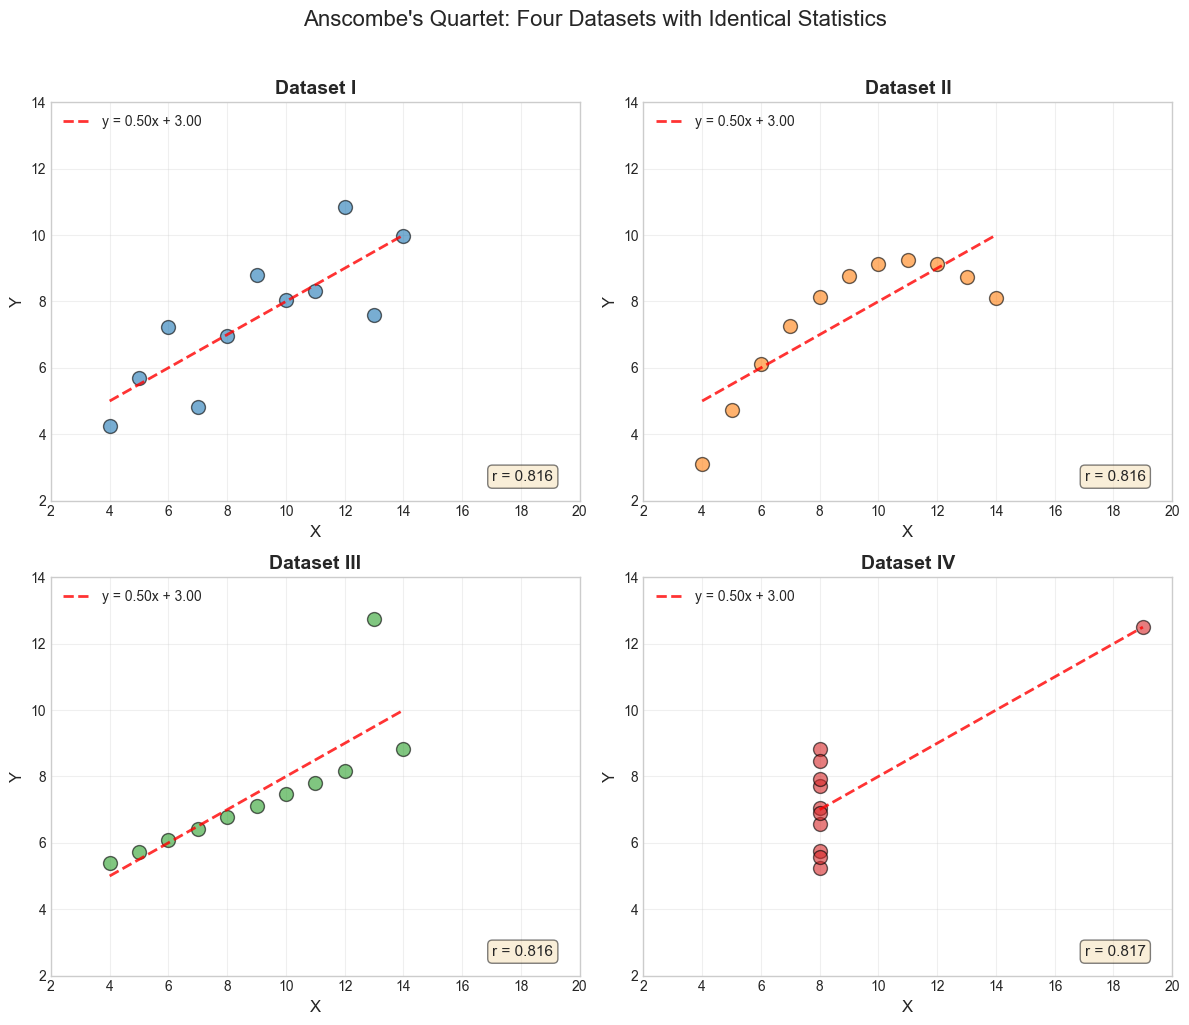


💡 THE REVELATION:
Despite having identical statistics, the four datasets are COMPLETELY DIFFERENT!

• Dataset I:   A typical linear relationship with some scatter
• Dataset II:  A perfect parabolic (curved) relationship
• Dataset III: A perfect linear relationship with one outlier
• Dataset IV:  No relationship at all - just one outlier creating the statistics!


In [5]:
# Create the famous Anscombe's Quartet visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Anscombe's Quartet: Four Datasets with Identical Statistics", fontsize=16, y=1.02)

# Define positions for subplots
positions = [(0, 0), (0, 1), (1, 0), (1, 1)]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

for (name, pos, color) in zip(['I', 'II', 'III', 'IV'], positions, colors):
    ax = axes[pos]
    df = datasets[name]
    
    # Scatter plot
    ax.scatter(df['x'], df['y'], s=100, color=color, alpha=0.6, edgecolors='black', linewidth=1)
    
    # Add regression line
    slope, intercept, _, _, _ = stats.linregress(df['x'], df['y'])
    x_line = np.array([df['x'].min(), df['x'].max()])
    y_line = slope * x_line + intercept
    ax.plot(x_line, y_line, 'r--', linewidth=2, alpha=0.8, 
            label=f'y = {slope:.2f}x + {intercept:.2f}')
    
    # Formatting
    ax.set_xlabel('X', fontsize=12)
    ax.set_ylabel('Y', fontsize=12)
    ax.set_title(f'Dataset {name}', fontsize=14, fontweight='bold')
    ax.set_xlim(2, 20)
    ax.set_ylim(2, 14)
    ax.grid(True, alpha=0.3)
    ax.legend(loc='upper left', fontsize=10)
    
    # Add correlation value
    correlation = df['x'].corr(df['y'])
    ax.text(0.95, 0.05, f'r = {correlation:.3f}', 
            transform=ax.transAxes, fontsize=11,
            horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print("\n💡 THE REVELATION:")
print("="*70)
print("Despite having identical statistics, the four datasets are COMPLETELY DIFFERENT!")
print("\n• Dataset I:   A typical linear relationship with some scatter")
print("• Dataset II:  A perfect parabolic (curved) relationship")
print("• Dataset III: A perfect linear relationship with one outlier")
print("• Dataset IV:  No relationship at all - just one outlier creating the statistics!")

## Step 5: Detailed Analysis of Each Dataset

Let's examine what makes each dataset unique:

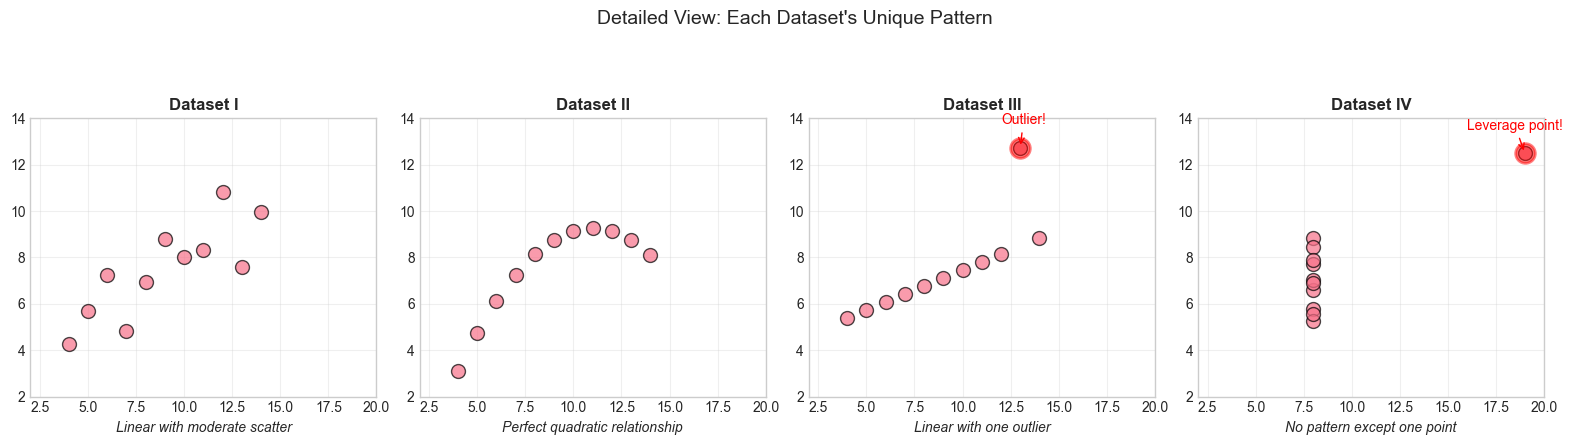

In [6]:
# Create individual detailed plots
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
fig.suptitle("Detailed View: Each Dataset's Unique Pattern", fontsize=14, y=1.1)

descriptions = [
    "Linear with moderate scatter",
    "Perfect quadratic relationship",
    "Linear with one outlier",
    "No pattern except one point"
]

for idx, (name, desc) in enumerate(zip(['I', 'II', 'III', 'IV'], descriptions)):
    ax = axes[idx]
    df = datasets[name]
    
    # Plot points
    ax.scatter(df['x'], df['y'], s=100, alpha=0.7, edgecolors='black', linewidth=1)
    
    # Special annotations for interesting points
    if name == 'III':
        # Highlight the outlier in Dataset III
        outlier_idx = df['y'].idxmax()
        ax.scatter(df.loc[outlier_idx, 'x'], df.loc[outlier_idx, 'y'], 
                  s=200, color='red', alpha=0.5, edgecolors='red', linewidth=2)
        ax.annotate('Outlier!', 
                   xy=(df.loc[outlier_idx, 'x'], df.loc[outlier_idx, 'y']),
                   xytext=(df.loc[outlier_idx, 'x']-1, df.loc[outlier_idx, 'y']+1),
                   arrowprops=dict(arrowstyle='->', color='red'),
                   fontsize=10, color='red')
    
    if name == 'IV':
        # Highlight the leverage point in Dataset IV
        leverage_idx = df['x'].idxmax()
        ax.scatter(df.loc[leverage_idx, 'x'], df.loc[leverage_idx, 'y'], 
                  s=200, color='red', alpha=0.5, edgecolors='red', linewidth=2)
        ax.annotate('Leverage point!', 
                   xy=(df.loc[leverage_idx, 'x'], df.loc[leverage_idx, 'y']),
                   xytext=(df.loc[leverage_idx, 'x']-3, df.loc[leverage_idx, 'y']+1),
                   arrowprops=dict(arrowstyle='->', color='red'),
                   fontsize=10, color='red')
    
    ax.set_title(f'Dataset {name}', fontweight='bold')
    ax.set_xlabel(desc, fontsize=10, style='italic')
    ax.grid(True, alpha=0.3)
    ax.set_xlim(2, 20)
    ax.set_ylim(2, 14)

plt.tight_layout()
plt.show()

## Step 6: Why This Matters - Real-World Implications

In [7]:
# Create a comparison showing what could go wrong
print("="*70)
print("REAL-WORLD IMPLICATIONS")
print("="*70)

print("\n📊 What if these were real business scenarios?\n")

scenarios = {
    'I': {
        'title': 'Marketing Spend vs Sales',
        'interpretation': 'Normal linear relationship with natural variation',
        'decision': '✅ Safe to increase marketing budget',
        'risk': 'LOW'
    },
    'II': {
        'title': 'Price vs Demand',
        'interpretation': 'Non-linear relationship (diminishing returns)',
        'decision': '⚠️ Linear model would give wrong predictions!',
        'risk': 'HIGH - Would miss the curve pattern'
    },
    'III': {
        'title': 'Employee Hours vs Productivity',
        'interpretation': 'Generally linear but one exceptional case',
        'decision': '⚠️ Need to investigate the outlier - fraud? error? star performer?',
        'risk': 'MEDIUM - Outlier could skew all predictions'
    },
    'IV': {
        'title': 'Store Size vs Revenue',
        'interpretation': 'No real pattern - one mega-store distorts everything',
        'decision': '❌ Cannot use this model for predictions!',
        'risk': 'CRITICAL - Entire analysis is meaningless'
    }
}

for dataset, scenario in scenarios.items():
    print(f"\n{'='*60}")
    print(f"Dataset {dataset}: {scenario['title']}")
    print(f"{'='*60}")
    print(f"Pattern: {scenario['interpretation']}")
    print(f"Decision: {scenario['decision']}")
    print(f"Risk Level: {scenario['risk']}")

REAL-WORLD IMPLICATIONS

📊 What if these were real business scenarios?


Dataset I: Marketing Spend vs Sales
Pattern: Normal linear relationship with natural variation
Decision: ✅ Safe to increase marketing budget
Risk Level: LOW

Dataset II: Price vs Demand
Pattern: Non-linear relationship (diminishing returns)
Decision: ⚠️ Linear model would give wrong predictions!
Risk Level: HIGH - Would miss the curve pattern

Dataset III: Employee Hours vs Productivity
Pattern: Generally linear but one exceptional case
Decision: ⚠️ Need to investigate the outlier - fraud? error? star performer?
Risk Level: MEDIUM - Outlier could skew all predictions

Dataset IV: Store Size vs Revenue
Pattern: No real pattern - one mega-store distorts everything
Decision: ❌ Cannot use this model for predictions!
Risk Level: CRITICAL - Entire analysis is meaningless


## Step 7: Interactive Comparison Tool

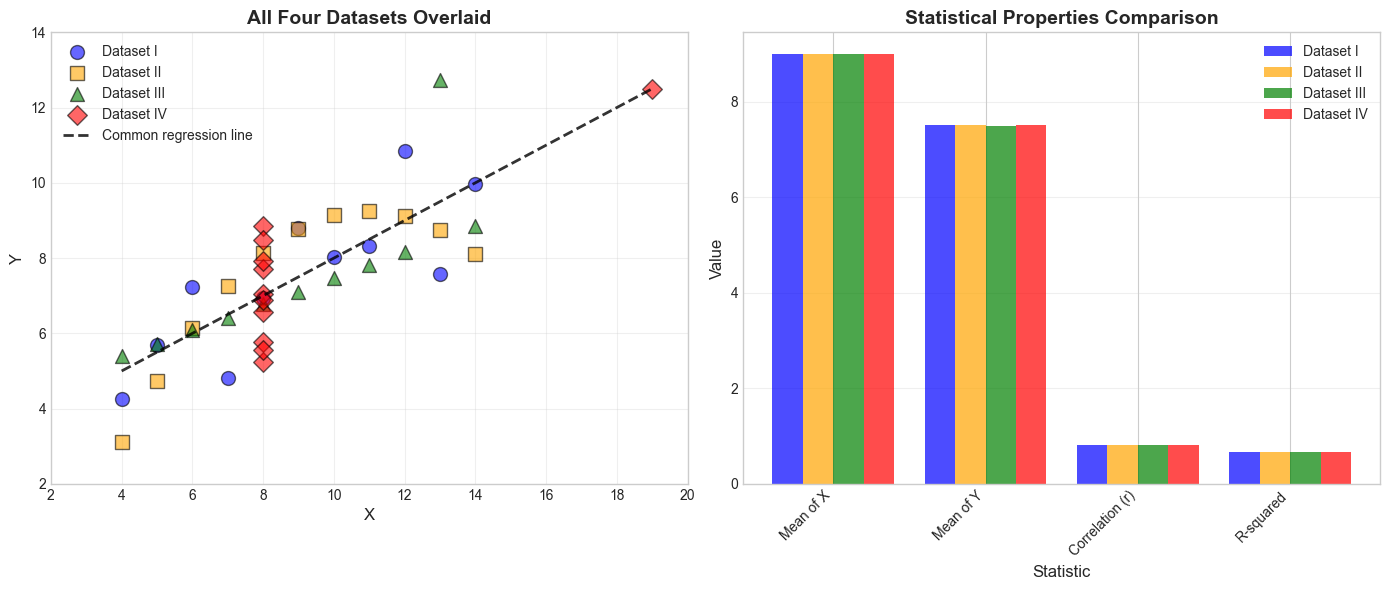


🎯 KEY INSIGHT: All four datasets occupy different regions of the plot
   yet produce the same summary statistics!


In [8]:
# Create an overlay plot to show all four datasets at once
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Left plot: All datasets overlaid
colors = ['blue', 'orange', 'green', 'red']
markers = ['o', 's', '^', 'D']

for name, color, marker in zip(['I', 'II', 'III', 'IV'], colors, markers):
    df = datasets[name]
    ax1.scatter(df['x'], df['y'], s=100, color=color, alpha=0.6, 
               marker=marker, label=f'Dataset {name}', edgecolors='black')

# Add the common regression line
x_line = np.linspace(4, 19, 100)
y_line = 0.5 * x_line + 3  # The common regression line
ax1.plot(x_line, y_line, 'k--', linewidth=2, alpha=0.8, 
        label='Common regression line')

ax1.set_xlabel('X', fontsize=12)
ax1.set_ylabel('Y', fontsize=12)
ax1.set_title('All Four Datasets Overlaid', fontsize=14, fontweight='bold')
ax1.legend(loc='upper left')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(2, 20)
ax1.set_ylim(2, 14)

# Right plot: Statistical properties comparison
stats_to_plot = ['Mean of X', 'Mean of Y', 'Correlation (r)', 'R-squared']
x_pos = np.arange(len(stats_to_plot))
width = 0.2

for i, name in enumerate(['I', 'II', 'III', 'IV']):
    values = [statistics.loc[name, stat] for stat in stats_to_plot]
    ax2.bar(x_pos + i*width, values, width, label=f'Dataset {name}', 
           color=colors[i], alpha=0.7)

ax2.set_xlabel('Statistic', fontsize=12)
ax2.set_ylabel('Value', fontsize=12)
ax2.set_title('Statistical Properties Comparison', fontsize=14, fontweight='bold')
ax2.set_xticks(x_pos + width * 1.5)
ax2.set_xticklabels(stats_to_plot, rotation=45, ha='right')
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n🎯 KEY INSIGHT: All four datasets occupy different regions of the plot")
print("   yet produce the same summary statistics!")

## Key Lessons for Data Analysts

### 1. **Always Visualize Your Data**
   - Summary statistics are not enough
   - Patterns, outliers, and relationships are often only visible in plots

### 2. **Different Patterns Can Have Same Statistics**
   - Linear relationships
   - Non-linear relationships
   - Outlier-driven patterns
   - No real pattern at all

### 3. **Check Your Assumptions**
   - Linear regression assumes a linear relationship
   - One outlier can completely change your analysis
   - Correlation does not describe all types of relationships

### 4. **Real-World Impact**
   - Wrong models lead to wrong predictions
   - Business decisions based only on statistics can be catastrophic
   - Always combine statistical analysis with visual exploration

In [9]:
# Final summary
print("="*70)
print("ANSCOMBE'S QUARTET: FINAL THOUGHTS")
print("="*70)

print("\n📚 Historical Context:")
print("   Francis Anscombe created this quartet in 1973 to demonstrate")
print("   the importance of graphing data before analyzing it.")

print("\n🎯 The Core Message:")
print("   'Numerical calculations are exact, but graphs are rough.'")
print("   - F.J. Anscombe")
print("\n   The 'rough' graphs revealed what 'exact' calculations could not!")

print("\n✅ Your EDA Checklist:")
print("   1. Calculate summary statistics")
print("   2. Create multiple visualizations")
print("   3. Look for patterns AND anomalies")
print("   4. Question unexpected results")
print("   5. Let the data tell its story")

print("\n💡 Remember: In data analysis, a picture really is worth a thousand numbers!")

ANSCOMBE'S QUARTET: FINAL THOUGHTS

📚 Historical Context:
   Francis Anscombe created this quartet in 1973 to demonstrate
   the importance of graphing data before analyzing it.

🎯 The Core Message:
   'Numerical calculations are exact, but graphs are rough.'
   - F.J. Anscombe

   The 'rough' graphs revealed what 'exact' calculations could not!

✅ Your EDA Checklist:
   1. Calculate summary statistics
   2. Create multiple visualizations
   3. Look for patterns AND anomalies
   4. Question unexpected results
   5. Let the data tell its story

💡 Remember: In data analysis, a picture really is worth a thousand numbers!
